In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
nifty_indices = ['50', '100', '200', '500', 'BANK', 'COMMODITIES', 'ENERGY', 'HEALTHCARE', 'HOUSING', 'MNC', 'OIL & GAS', 'PHARMA']

df20_21 = pd.concat([pd.read_csv(f'E:/Documents/ResearchIntern/USD Prediction/Datasets/FY 20-21/NIFTY {a}_20-21.csv') for a in nifty_indices])
df21_22 = pd.concat([pd.read_csv(f'E:/Documents/ResearchIntern/USD Prediction/Datasets/FY 21-22/NIFTY {a}_21-22.csv') for a in nifty_indices])
df22_23 = pd.concat([pd.read_csv(f'E:/Documents/ResearchIntern/USD Prediction/Datasets/FY 22-23/NIFTY {a}_22-23.csv') for a in nifty_indices])
df23_24 = pd.concat([pd.read_csv(f'E:/Documents/ResearchIntern/USD Prediction/Datasets/FY 23-24/NIFTY {a}_23-24.csv') for a in nifty_indices])
df24_25 = pd.concat([pd.read_csv(f'E:/Documents/ResearchIntern/USD Prediction/Datasets/FY 24-25/NIFTY {a}_24-25.csv') for a in nifty_indices])

In [3]:
df = pd.concat([df20_21, df21_22, df22_23, df23_24, df24_25])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14892 entries, 0 to 248
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  14892 non-null  object 
 1   Date        14892 non-null  object 
 2   Open        14892 non-null  object 
 3   High        14892 non-null  object 
 4   Low         14892 non-null  object 
 5   Close       14892 non-null  float64
dtypes: float64(1), object(5)
memory usage: 814.4+ KB


In [4]:
def average(row):
    try:
        return (row["High"] + row["Low"]) * 0.5
    except:
        return row["Close"]

In [5]:
df["Average"] = df.apply(average, axis=1)

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df = df.pivot(index="Date", columns="Index Name", values="Average")
df

Index Name,NIFTY 100,NIFTY 200,NIFTY 50,NIFTY 500,NIFTY BANK,NIFTY COMMODITIES,NIFTY ENERGY,NIFTY HEALTHCARE,NIFTY HOUSING,NIFTY MNC,NIFTY OIL & GAS,NIFTY PHARMA
Date,,,,,,,,,,,,
2020-04-01,8538.725,4340.000,8393.225,6859.425,18598.500,2249.850,10895.050,4319.310,3325.59,10929.175,3530.410,7099.925
2020-04-03,8355.500,4251.450,8206.175,6725.600,17734.650,2216.900,10840.800,4500.690,3226.59,10748.500,3588.600,7204.500
2020-04-07,8733.550,4437.150,8590.175,7003.825,18572.150,2307.125,11389.675,4914.580,3441.69,11213.700,3873.520,7864.800
2020-04-08,9047.600,4595.875,8892.800,7248.425,19403.500,2380.525,11709.225,5104.500,3437.32,11639.150,3882.020,8310.575
2020-04-09,9194.025,4674.775,9016.450,7376.650,19577.600,2417.050,11927.900,5304.160,3573.37,11852.000,3984.380,8869.400
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,24128.375,13044.575,23571.125,21471.325,51298.525,8498.500,33954.650,14054.925,10936.70,26419.450,10683.100,21707.725
2025-03-25,24253.450,13097.500,23735.500,21529.925,51746.775,8516.475,33781.650,14013.375,10892.50,26413.575,10634.150,21648.400
2025-03-26,24102.475,13017.300,23594.100,21390.650,51472.475,8464.100,33478.425,13866.300,10808.40,26397.725,10520.625,21447.175


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2020-04-01 to 2025-03-28
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIFTY 100          1241 non-null   float64
 1   NIFTY 200          1241 non-null   float64
 2   NIFTY 50           1241 non-null   float64
 3   NIFTY 500          1241 non-null   float64
 4   NIFTY BANK         1241 non-null   float64
 5   NIFTY COMMODITIES  1241 non-null   float64
 6   NIFTY ENERGY       1241 non-null   float64
 7   NIFTY HEALTHCARE   1241 non-null   float64
 8   NIFTY HOUSING      1241 non-null   float64
 9   NIFTY MNC          1241 non-null   float64
 10  NIFTY OIL & GAS    1241 non-null   float64
 11  NIFTY PHARMA       1241 non-null   float64
dtypes: float64(12)
memory usage: 126.0 KB


In [9]:
currency_rates = pd.concat([pd.read_csv(f"E:/Documents/ResearchIntern/USD Prediction/Datasets/FY {a}/RBI-Reference-Rate-{a}.csv") for a in ["20-21", "21-22", "22-23", "23-24", "24-25"]])
currency_rates.head()

,Trade Date,1 USD,1 GBP,1 EURO,100 YEN
0,31-Mar-2021,73.5047,100.9509,86.0990,66.36
1,30-Mar-2021,73.0407,100.5598,85.8494,66.34
2,26-Mar-2021,72.4046,99.6234,85.3129,66.26
3,25-Mar-2021,72.6102,99.3675,85.8190,66.63
4,24-Mar-2021,72.6558,99.6150,86.0230,66.96


In [10]:
currency_rates = currency_rates.drop(columns=["1 GBP ", "1 EURO ", "100 YEN "])

In [11]:
currency_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 238
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Trade Date   1190 non-null   object 
 1   1 USD        1190 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.9+ KB


In [12]:
currency_rates["Trade Date "] = pd.to_datetime(currency_rates["Trade Date "])
currency_rates.rename(columns={"Trade Date ": "Date", "1 USD ": "USD Rate"}, inplace=True)
currency_rates.set_index("Date", inplace=True)

In [13]:
df = df.merge(currency_rates, how='inner', left_index=True, right_index=True)
df

,NIFTY 100,NIFTY 200,NIFTY 50,NIFTY 500,NIFTY BANK,NIFTY COMMODITIES,NIFTY ENERGY,NIFTY HEALTHCARE,NIFTY HOUSING,NIFTY MNC,NIFTY OIL & GAS,NIFTY PHARMA,USD Rate
Date,,,,,,,,,,,,,
2020-04-03,8355.500,4251.450,8206.175,6725.600,17734.650,2216.900,10840.800,4500.690,3226.59,10748.500,3588.600,7204.500,75.8276
2020-04-07,8733.550,4437.150,8590.175,7003.825,18572.150,2307.125,11389.675,4914.580,3441.69,11213.700,3873.520,7864.800,75.8438
2020-04-08,9047.600,4595.875,8892.800,7248.425,19403.500,2380.525,11709.225,5104.500,3437.32,11639.150,3882.020,8310.575,76.0867
2020-04-09,9194.025,4674.775,9016.450,7376.650,19577.600,2417.050,11927.900,5304.160,3573.37,11852.000,3984.380,8869.400,76.4577
2020-04-13,9181.575,4667.775,9012.225,7366.325,19590.525,2425.625,11814.375,5394.510,3595.10,11829.625,3925.590,9040.800,76.3617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,24128.375,13044.575,23571.125,21471.325,51298.525,8498.500,33954.650,14054.925,10936.70,26419.450,10683.100,21707.725,85.8318
2025-03-25,24253.450,13097.500,23735.500,21529.925,51746.775,8516.475,33781.650,14013.375,10892.50,26413.575,10634.150,21648.400,85.7302
2025-03-26,24102.475,13017.300,23594.100,21390.650,51472.475,8464.100,33478.425,13866.300,10808.40,26397.725,10520.625,21447.175,85.8683


In [14]:
X = df[df.drop('USD Rate', axis=1).columns].pct_change().dropna()
y = df['USD Rate'].pct_change().dropna()

In [15]:
print(f"Financial indices shape: {X.shape}")
print(f"Currency returns shape: {y.shape}")

Financial indices shape: (1188, 12)
Currency returns shape: (1188,)


In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.utils import resample

selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(X, y)

scores = []
for _ in range(100):
    X_resampled, y_resampled = resample(X, y, random_state=42)
    selector.fit(X_resampled, y_resampled)
    scores.append(selector.scores_)

mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

results = pd.DataFrame({
    'Index': X.columns,
    'Mean Score': mean_scores,
    'Std Score': std_scores,
    'Z Score': (mean_scores - np.mean(mean_scores)) / np.std(mean_scores)
}).sort_values(by='Mean Score', ascending=False)

print(results)

                Index  Mean Score  Std Score   Z Score
0           NIFTY 100    0.826524   0.000520  1.072122
5   NIFTY COMMODITIES    0.825802   0.000623  1.058258
1           NIFTY 200    0.813208   0.000575  0.816279
6        NIFTY ENERGY    0.807283   0.000529  0.702447
10    NIFTY OIL & GAS    0.790928   0.000584  0.388221
2            NIFTY 50    0.787663   0.000511  0.325498
4          NIFTY BANK    0.782356   0.000529  0.223527
3           NIFTY 500    0.776821   0.000566  0.117177
7    NIFTY HEALTHCARE    0.774955   0.000517  0.081334
8       NIFTY HOUSING    0.705310   0.000562 -1.256768
9           NIFTY MNC    0.703340   0.000542 -1.294616
11       NIFTY PHARMA    0.654474   0.000620 -2.233480


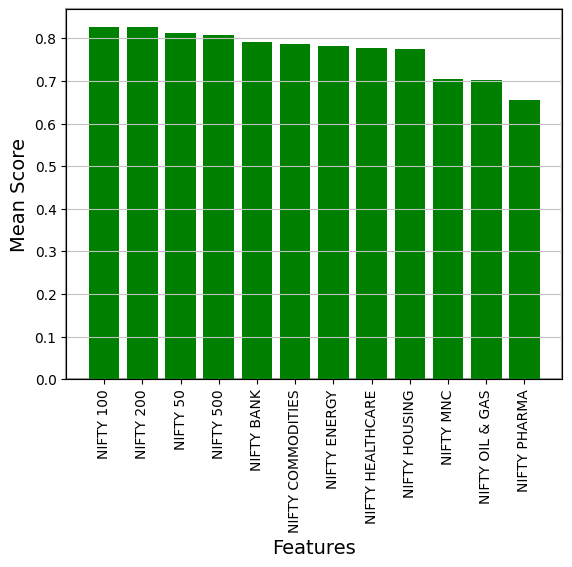

In [17]:
plt.bar(X.columns, results["Mean Score"] ,color=['green'])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,7)
#plt.title('Feature Selection', fontsize=14)
ax = plt.gca()
ax.patch.set_facecolor('white')
ax.yaxis.grid(True, color = '#C0C0C0') 
ax.patch.set_edgecolor('#A0A0A0')  
ax.patch.set_linewidth(1.5)
plt.xlabel('Features',fontsize=14)
plt.ylabel('Mean Score',fontsize=14)
plt.show()

In [18]:
# Selecting top 5 features

top_features = results.nlargest(5, 'Mean Score')['Index'].values

top_features_df = pd.DataFrame(df, columns=top_features)
top_features_df['USD Rate'] = df['USD Rate']
top_features_df

,NIFTY 100,NIFTY COMMODITIES,NIFTY 200,NIFTY ENERGY,NIFTY OIL & GAS,USD Rate
Date,,,,,,
2020-04-03,8355.500,2216.900,4251.450,10840.800,3588.600,75.8276
2020-04-07,8733.550,2307.125,4437.150,11389.675,3873.520,75.8438
2020-04-08,9047.600,2380.525,4595.875,11709.225,3882.020,76.0867
2020-04-09,9194.025,2417.050,4674.775,11927.900,3984.380,76.4577
2020-04-13,9181.575,2425.625,4667.775,11814.375,3925.590,76.3617
...,...,...,...,...,...,...
2025-03-24,24128.375,8498.500,13044.575,33954.650,10683.100,85.8318
2025-03-25,24253.450,8516.475,13097.500,33781.650,10634.150,85.7302
2025-03-26,24102.475,8464.100,13017.300,33478.425,10520.625,85.8683


In [19]:
# Split train and test data
from sklearn.model_selection import train_test_split

# train, test = train_test_split(top_features_df, test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)
print("Train Shape: {} \nTest Shape: {}".format(train.shape, test.shape))

Train Shape: (951, 13) 
Test Shape: (238, 13)


In [20]:
X_train = train.drop(columns=['USD Rate'])
y_train = train['USD Rate']
print('before sampling: \nX_train  shape: {} \ny_train shape: {}'.format(X_train.shape, y_train.shape))

before sampling: 
X_train  shape: (951, 12) 
y_train shape: (951,)


In [21]:
X_test = test.drop(columns=['USD Rate'])
y_test = test['USD Rate']
print('\nX_test  shape: {} \ny_test shape: {}'.format(X_test.shape, y_test.shape))


X_test  shape: (238, 12) 
y_test shape: (238,)


In [22]:
result_name = []
result_accuracy = []
result_mae = []
result_mse = []
result_rmse = []
result_r2 = []

Random Forest Regressor Results
Accuracy:  0.9884366104075178
Mean Absolute Error:  0.27330829831932496
Mean Squared Error:  0.22785915354480185
Root Mean Squared Error:  0.4773459474477623
R2 Score:  0.9884366104075178
Feature Importance:  [0.001711   0.00152186 0.00247702 0.00602059 0.82542686 0.01049783
 0.06839981 0.03718728 0.00476442 0.0101532  0.00205023 0.0297899 ]
Feature ranking:
1. feature 4 (0.825427)
2. feature 6 (0.068400)
3. feature 7 (0.037187)
4. feature 11 (0.029790)
5. feature 5 (0.010498)
6. feature 9 (0.010153)
7. feature 3 (0.006021)
8. feature 8 (0.004764)
9. feature 2 (0.002477)
10. feature 10 (0.002050)
11. feature 0 (0.001711)
12. feature 1 (0.001522)


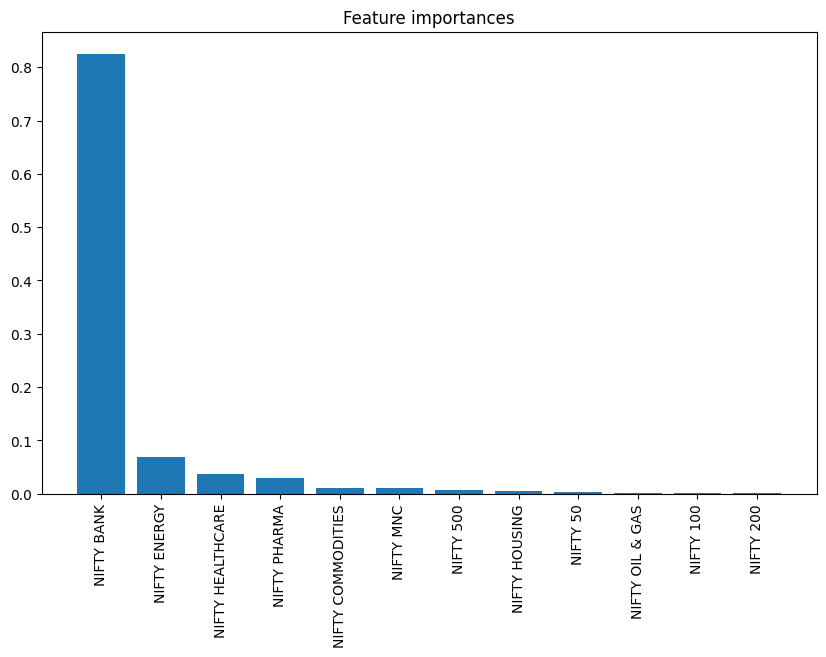

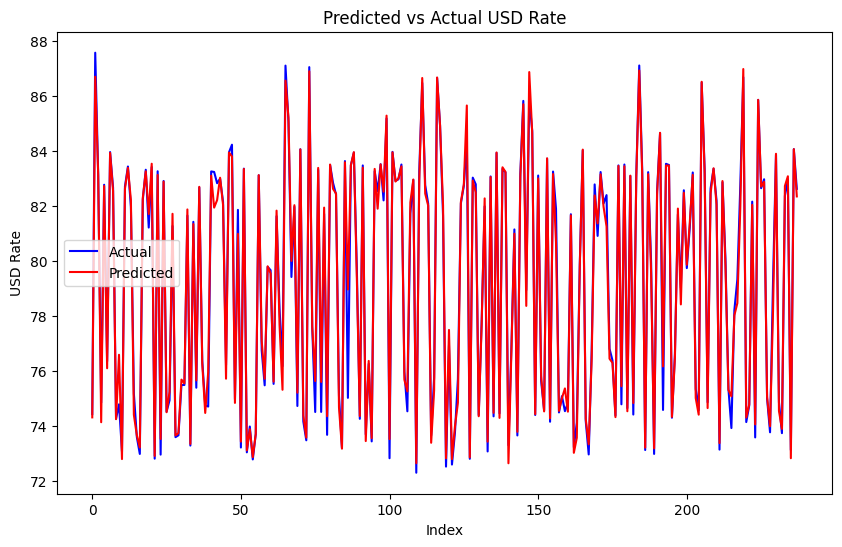

In [23]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

result_name.append("Random Forest Regressor")
result_accuracy.append(rf.score(X_test, y_test))
result_mae.append(mean_absolute_error(y_test, y_pred))
result_mse.append(mean_squared_error(y_test, y_pred))
result_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
result_r2.append(r2_score(y_test, y_pred))

print("Random Forest Regressor Results")
print("Accuracy: ", rf.score(X_test, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Feature Importance: ", rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual USD Rate')
plt.xlabel('Index')
plt.ylabel('USD Rate')
plt.legend()
plt.show()


XGBoost Regressor Results
Accuracy:  0.9903272973352726
Mean Absolute Error:  0.26550210591805085
Mean Squared Error:  0.1906027487916053
Root Mean Squared Error:  0.43658074716094075
R2 Score:  0.9903272973352726
Feature Importance:  [0.00543076 0.00110183 0.00092    0.08334388 0.7251411  0.00644914
 0.07089903 0.03941488 0.01288554 0.01382361 0.00123071 0.03935952]
Feature ranking:
1. feature 4 (0.725141)
2. feature 3 (0.083344)
3. feature 6 (0.070899)
4. feature 7 (0.039415)
5. feature 11 (0.039360)
6. feature 9 (0.013824)
7. feature 8 (0.012886)
8. feature 5 (0.006449)
9. feature 0 (0.005431)
10. feature 10 (0.001231)
11. feature 1 (0.001102)
12. feature 2 (0.000920)


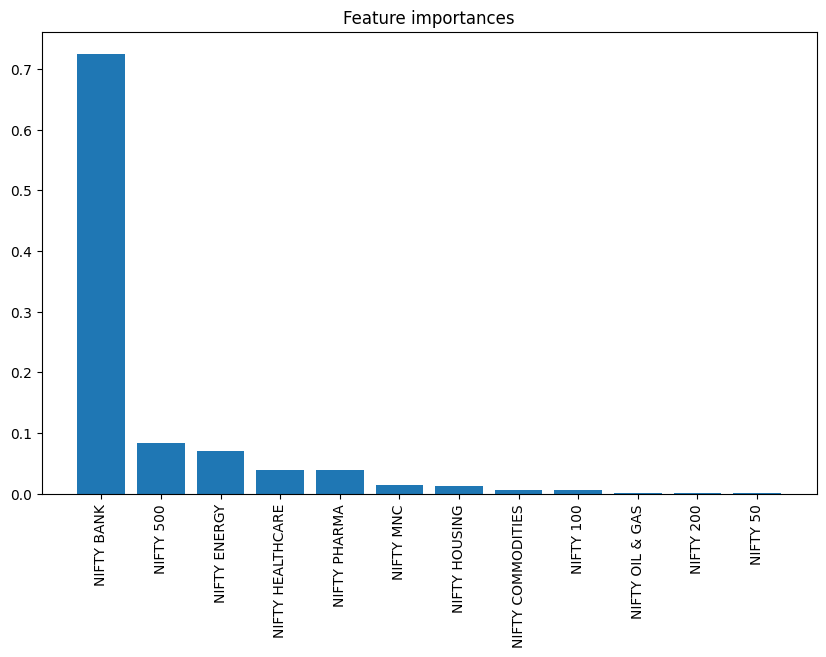

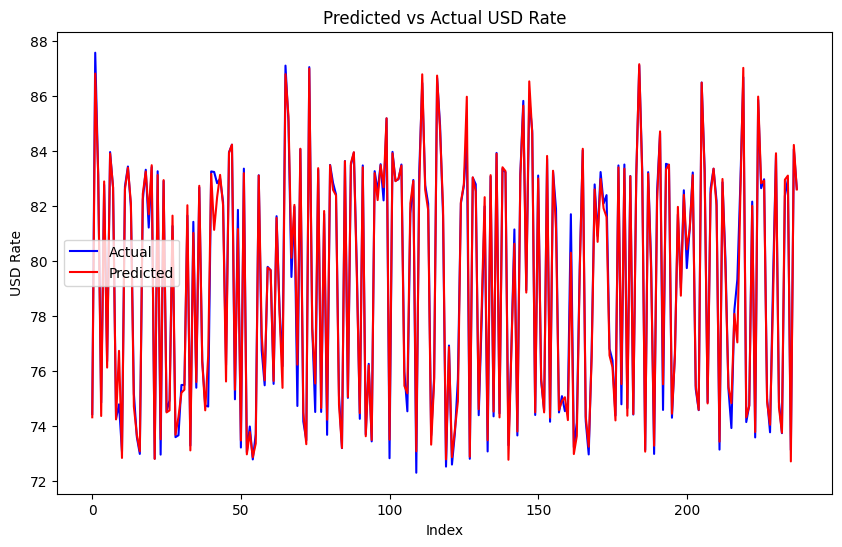

In [24]:
# Using XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

result_name.append("XGBoost Regressor")
result_accuracy.append(xgb.score(X_test, y_test))
result_mae.append(mean_absolute_error(y_test, y_pred))
result_mse.append(mean_squared_error(y_test, y_pred))
result_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
result_r2.append(r2_score(y_test, y_pred))

print("XGBoost Regressor Results")
print("Accuracy: ", xgb.score(X_test, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Feature Importance: ", xgb.feature_importances_)
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual USD Rate')
plt.xlabel('Index')
plt.ylabel('USD Rate')
plt.legend()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 12
[LightGBM] [Info] Start training from score 79.378492
LGBM Regressor Results
Accuracy:  0.9880064512772387
Mean Absolute Error:  0.29913065183016047
Mean Squared Error:  0.23633553449962977
Root Mean Squared Error:  0.48614353281683154
R2 Score:  0.9880064512772387
Feature Importance:  [176  75 153 132 493 275 346 277 191 307 277 298]
Feature ranking:
1. feature 4 (493.000000)
2. feature 6 (346.000000)
3. feature 9 (307.000000)
4. feature 11 (298.000000)
5. feature 10 (277.000000)
6. feature 7 (277.000000)
7. feature 5 (275.000000)
8. feature 8 (191.000000)
9. feature 0 (176.000000)
10. feature 2 (153.000000)
11. feature 3 (1

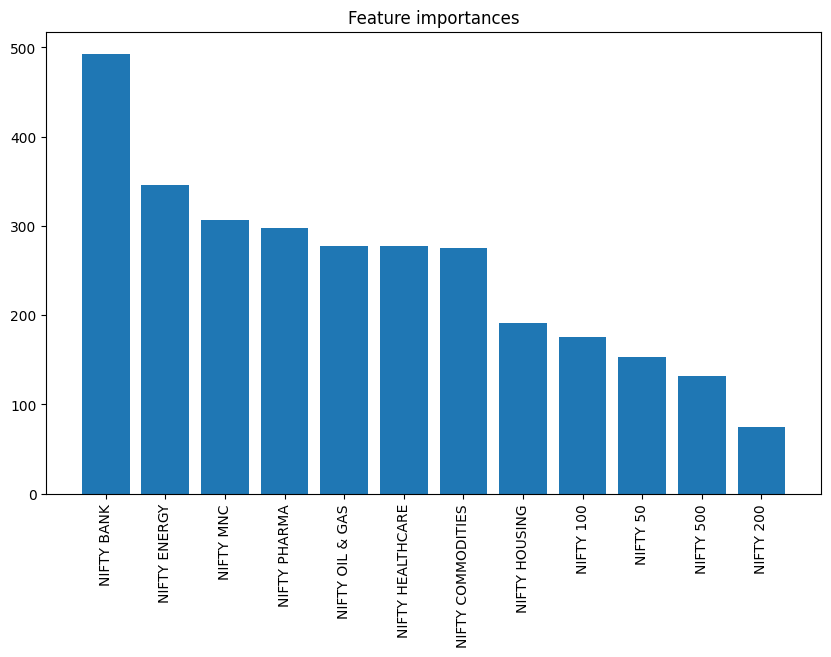

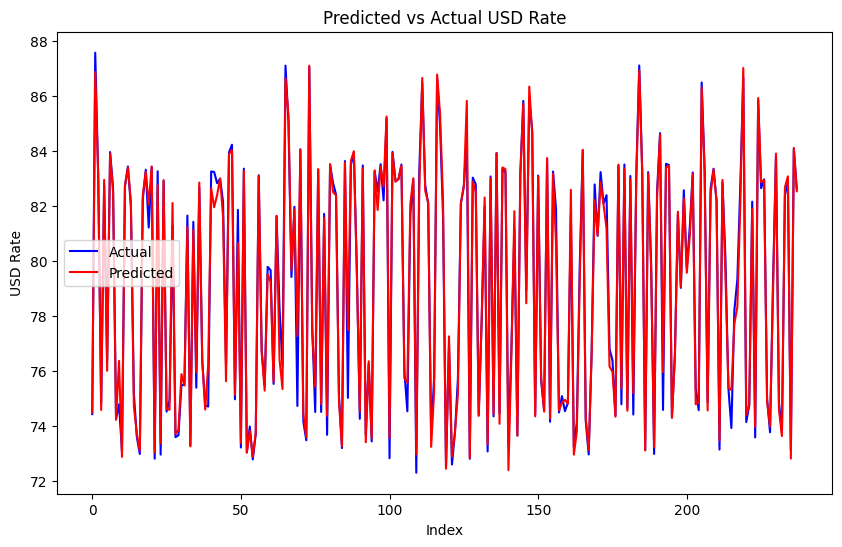

In [25]:
# Using lgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lgbm = LGBMRegressor(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

result_name.append("LGBM Regressor")
result_accuracy.append(lgbm.score(X_test, y_test))
result_mae.append(mean_absolute_error(y_test, y_pred))
result_mse.append(mean_squared_error(y_test, y_pred))
result_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
result_r2.append(r2_score(y_test, y_pred))

print("LGBM Regressor Results")
print("Accuracy: ", lgbm.score(X_test, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Feature Importance: ", lgbm.feature_importances_)
importances = lgbm.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual USD Rate')
plt.xlabel('Index')
plt.ylabel('USD Rate')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CatBoost Regressor Results
Accuracy:  0.9900392927981031
Mean Absolute Error:  0.3133797463099767
Mean Squared Error:  0.19627794199785784
Root Mean Squared Error:  0.44303266470753355
R2 Score:  0.9900392927981031
Feature Importance:  [ 0.47659912  4.89489907  0.92605595  0.27918894 28.72813214  5.32499886
 20.96494978  3.72198309  1.94140898 17.50475511  5.14230575 10.09472321]
Feature ranking:
1. feature 4 (28.728132)
2. feature 6 (20.964950)
3. feature 9 (17.504755)
4. feature 11 (10.094723)
5. feature 5 (5.324999)
6. feature 10 (5.142306)
7. feature 1 (4.894899)
8. feature 7 (3.721983)
9. feature 8 (1.941409)
10. feature 2 (0.926056)
11. feature 0 (0.476599)
12. feature 3 (0.279189)


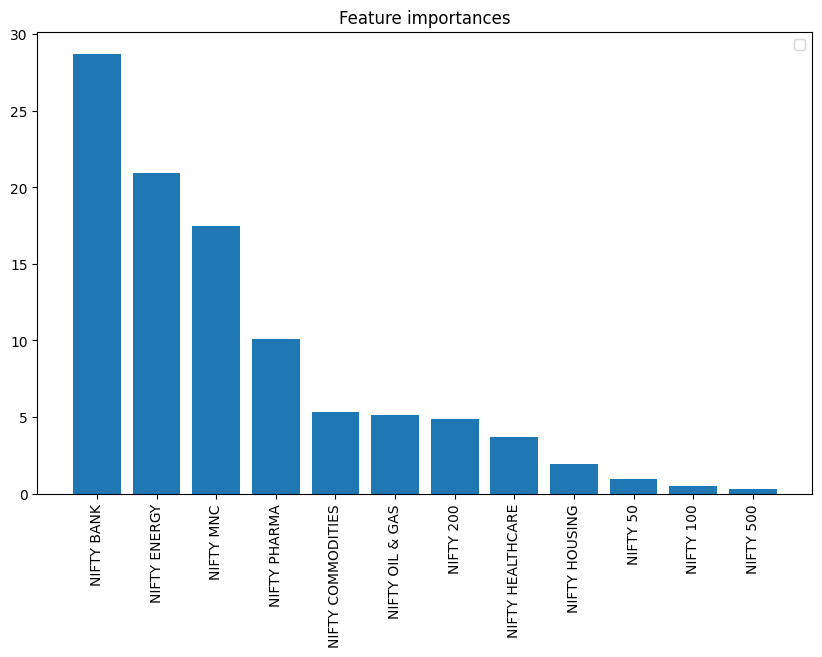

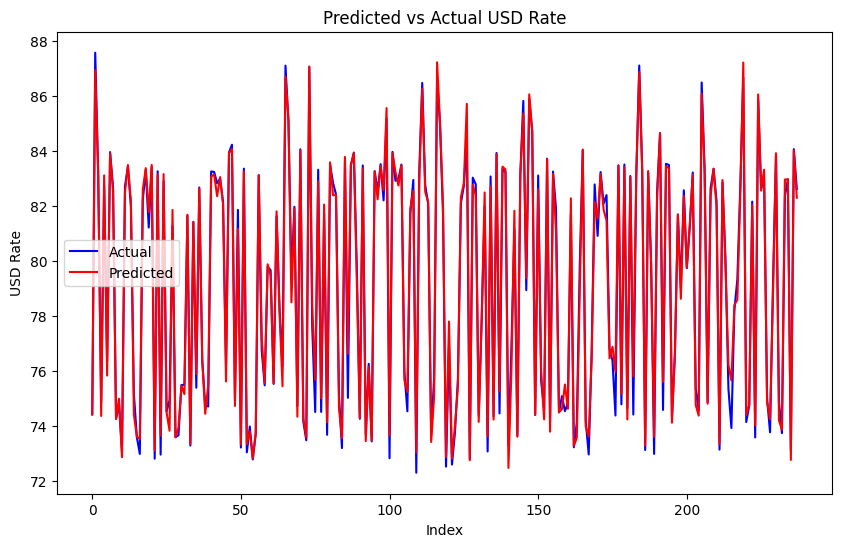

In [26]:
# Using catboost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

catboost = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)

result_name.append("CatBoost Regressor")
result_accuracy.append(catboost.score(X_test, y_test))
result_mae.append(mean_absolute_error(y_test, y_pred))
result_mse.append(mean_squared_error(y_test, y_pred))
result_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
result_r2.append(r2_score(y_test, y_pred))

print("CatBoost Regressor Results")
print("Accuracy: ", catboost.score(X_test, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Feature Importance: ", catboost.feature_importances_)
importances = catboost.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.legend()
plt.show()
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual USD Rate')
plt.xlabel('Index')
plt.ylabel('USD Rate')
plt.legend()
plt.show()
    

SVR Results
Accuracy:  0.8608488627052335
Mean Absolute Error:  1.2021181212750671
Mean Squared Error:  2.7420039863913304
Root Mean Squared Error:  1.6558997513108487
R2 Score:  0.8608488627052335


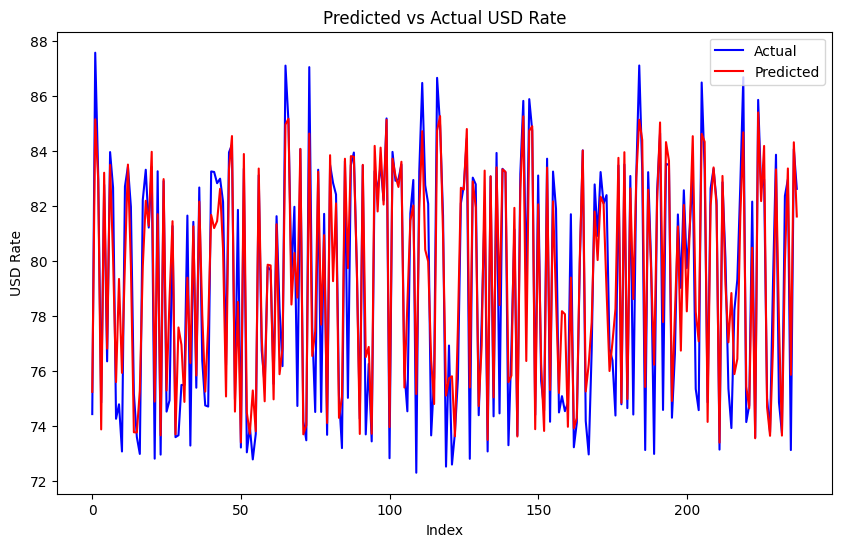

In [27]:
# Using SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

result_name.append("SVR")
result_accuracy.append(svr.score(X_test, y_test))
result_mae.append(mean_absolute_error(y_test, y_pred))
result_mse.append(mean_squared_error(y_test, y_pred))
result_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
result_r2.append(r2_score(y_test, y_pred))

print("SVR Results")
print("Accuracy: ", svr.score(X_test, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual USD Rate')
plt.xlabel('Index')
plt.ylabel('USD Rate')
plt.legend()
plt.show()


KNN Results
Accuracy:  0.9946485944787398
Mean Absolute Error:  0.21366571428571424
Mean Squared Error:  0.10545063128739458
Root Mean Squared Error:  0.3247316296380668
R2 Score:  0.9946485944787398


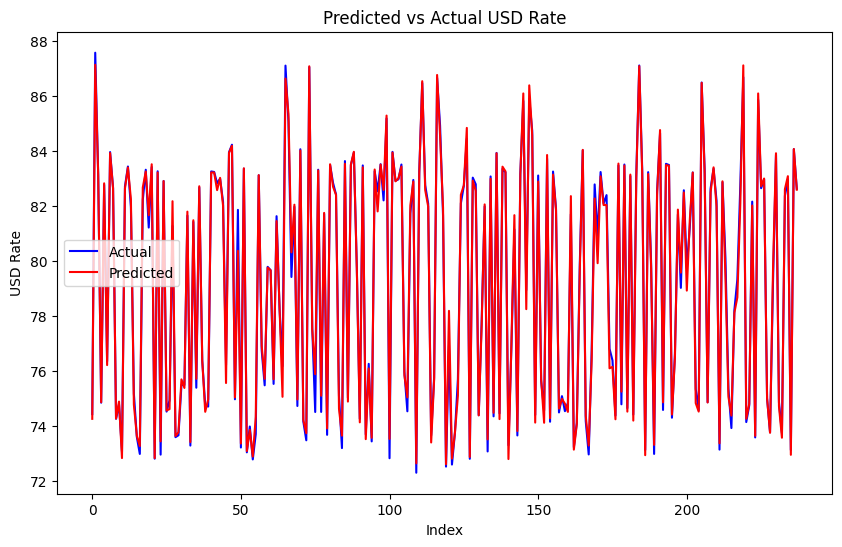

In [28]:
# Using KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

result_name.append("KNN Regressor")
result_accuracy.append(knn.score(X_test, y_test))
result_mae.append(mean_absolute_error(y_test, y_pred))
result_mse.append(mean_squared_error(y_test, y_pred))
result_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
result_r2.append(r2_score(y_test, y_pred))

print("KNN Results")
print("Accuracy: ", knn.score(X_test, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual USD Rate')
plt.xlabel('Index')
plt.ylabel('USD Rate')
plt.legend()
plt.show()



In [29]:
results_df = pd.DataFrame(data=[result_name, result_accuracy, result_mae, result_mse, result_rmse, result_r2]).T
results_df.columns = ['Model', 'Accuracy', 'MAE', 'MSE', 'RMSE', 'R2']
results_df = results_df.sort_values(by='Accuracy', ascending=False)
# remove index
results_df = results_df.reset_index(drop=True)
results_df

,Model,Accuracy,MAE,MSE,RMSE,R2
0,KNN Regressor,0.994649,0.213666,0.105451,0.324732,0.994649
1,XGBoost Regressor,0.990327,0.265502,0.190603,0.436581,0.990327
2,CatBoost Regressor,0.990039,0.31338,0.196278,0.443033,0.990039
3,Random Forest Regressor,0.988437,0.273308,0.227859,0.477346,0.988437
4,LGBM Regressor,0.988006,0.299131,0.236336,0.486144,0.988006
5,SVR,0.860849,1.202118,2.742004,1.6559,0.860849


c:\Python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parame

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score for Random Forest: 0.9836369654627743
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best score for XGBoost: 0.9860659304065899
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 12
[LightGBM] [Info] Start training from score 79.378492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVR: {'kernel': 'rbf', 'epsilon': 0.01, 'C': 10}
Best score for SVR: 0.9024082987023233


c:\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}
Best score for KNN: 0.9957770136573906
Results for Random Forest:
Accuracy:  0.9878615763466307
Mean Absolute Error:  0.2941147357843119
Mean Squared Error:  0.23919032710124336
Root Mean Squared Error:  0.48907088146938715
R2 Score:  0.9878615763466307
Feature ranking:
1. feature 4 (0.257213)
2. feature 9 (0.153269)
3. feature 2 (0.114507)
4. feature 8 (0.112701)
5. feature 1 (0.094287)
6. feature 3 (0.063215)
7. feature 6 (0.057757)
8. feature 11 (0.044014)
9. feature 7 (0.038438)
10. feature 0 (0.036657)
11. feature 10 (0.013989)
12. feature 5 (0.013953)


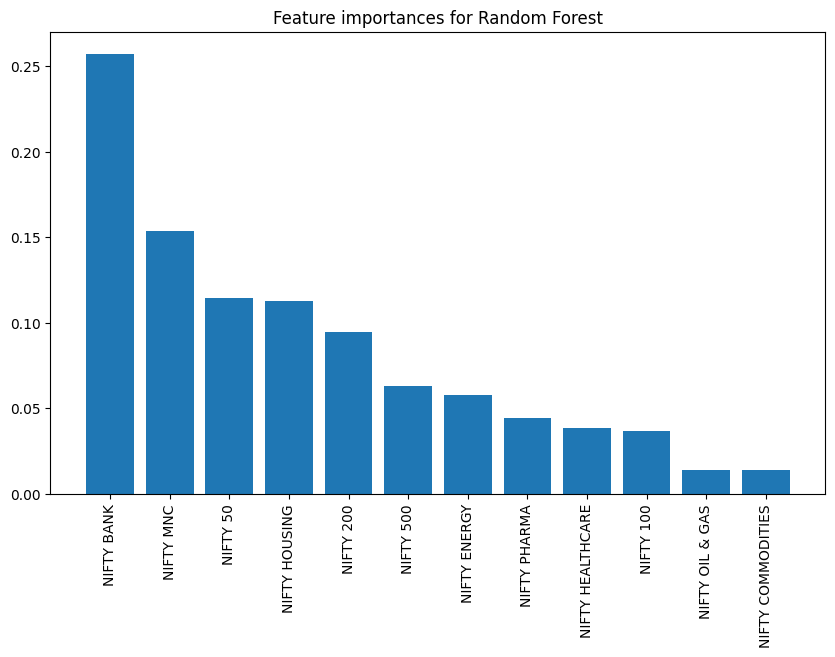

<Figure size 800x700 with 0 Axes>

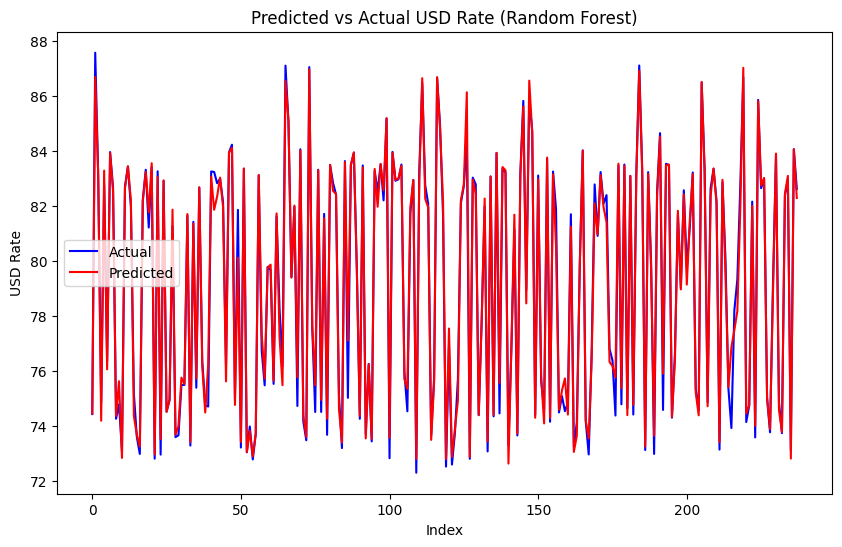

Results for XGBoost:
Accuracy:  0.9907600694836565
Mean Absolute Error:  0.28033511193539895
Mean Squared Error:  0.1820748777361658
Root Mean Squared Error:  0.42670232918999373
R2 Score:  0.9907600694836565
Feature ranking:
1. feature 4 (0.660808)
2. feature 9 (0.108302)
3. feature 3 (0.047413)
4. feature 7 (0.045333)
5. feature 6 (0.044703)
6. feature 11 (0.033878)
7. feature 10 (0.025442)
8. feature 8 (0.012373)
9. feature 5 (0.012035)
10. feature 0 (0.006965)
11. feature 2 (0.002011)
12. feature 1 (0.000735)


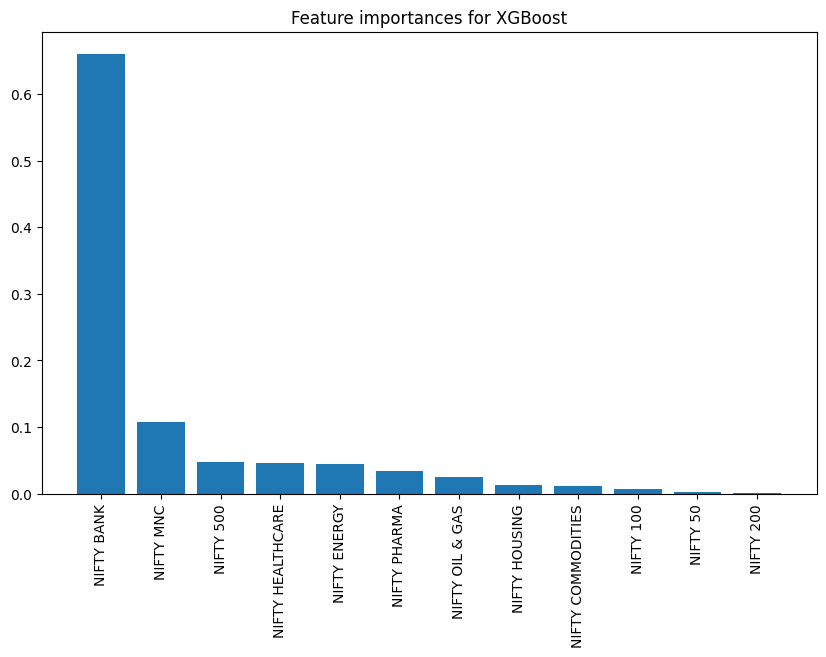

<Figure size 800x700 with 0 Axes>

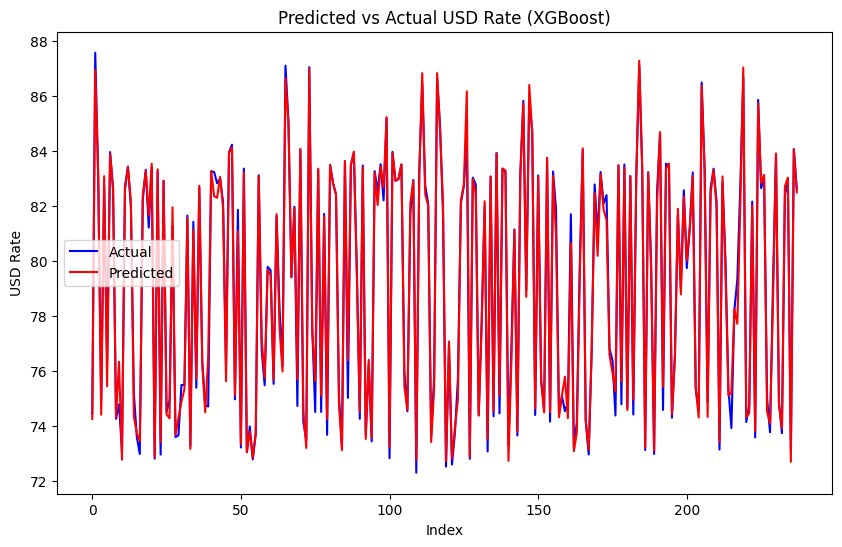

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 12
[LightGBM] [Info] Start training from score 79.378492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

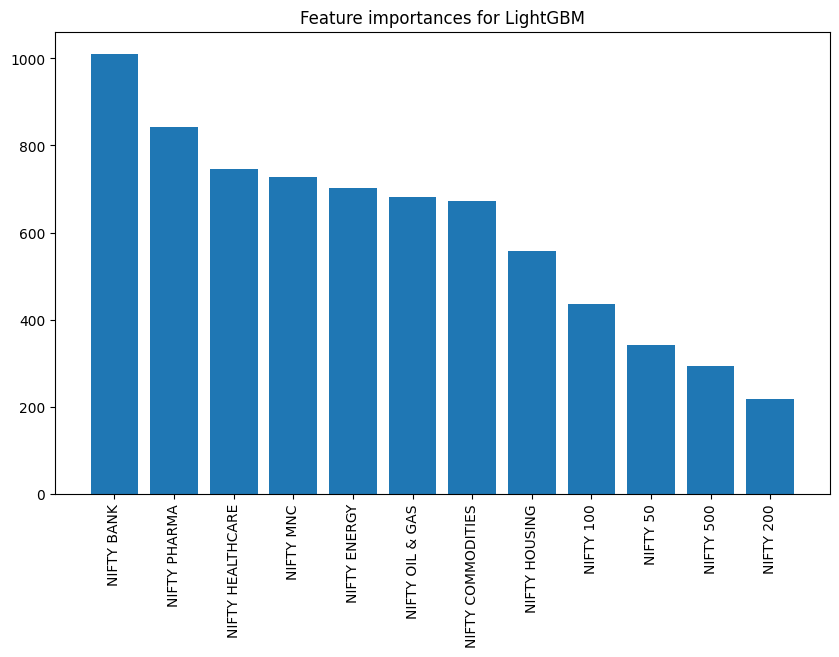

<Figure size 800x700 with 0 Axes>

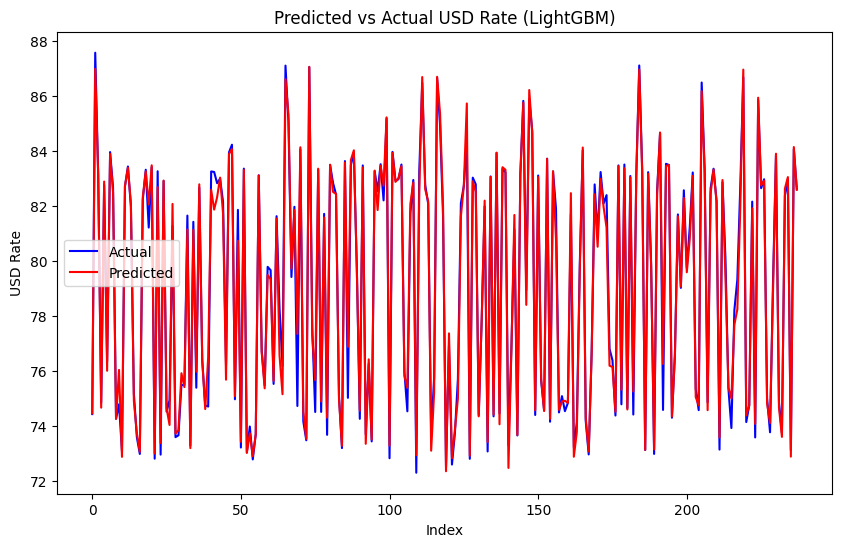

Results for CatBoost:
Accuracy:  0.9904121259988942
Mean Absolute Error:  0.2978410023756753
Mean Squared Error:  0.1889311811829429
Root Mean Squared Error:  0.4346621460202658
R2 Score:  0.9904121259988942
Feature ranking:
1. feature 4 (35.967578)
2. feature 6 (19.572210)
3. feature 11 (14.182427)
4. feature 9 (7.887342)
5. feature 7 (5.273411)
6. feature 1 (4.497871)
7. feature 5 (3.801158)
8. feature 3 (3.609475)
9. feature 10 (2.219978)
10. feature 0 (1.335232)
11. feature 2 (0.898657)
12. feature 8 (0.754661)


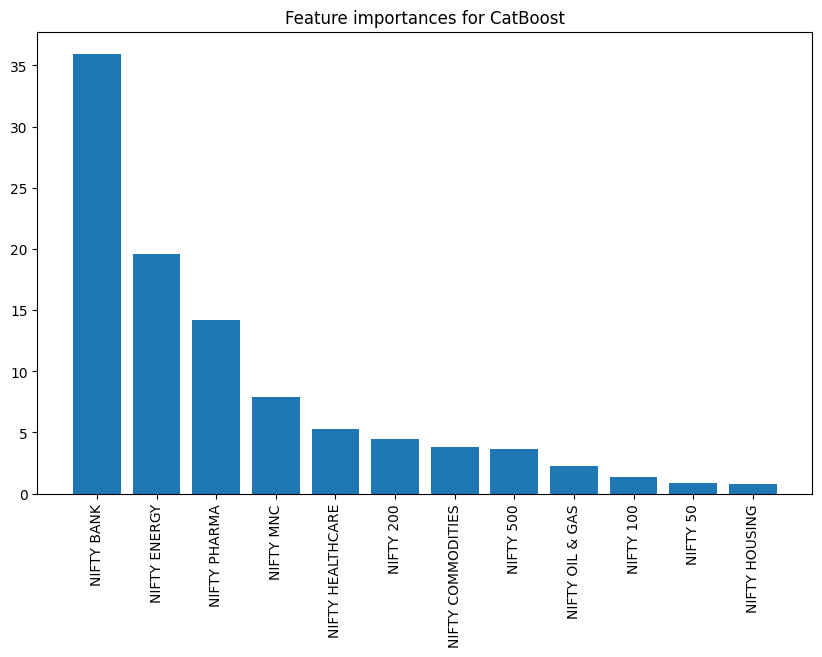

<Figure size 800x700 with 0 Axes>

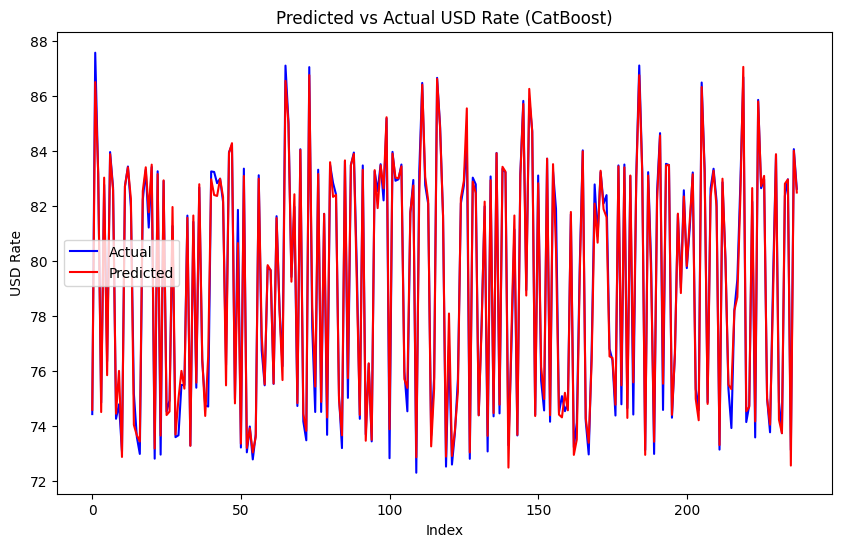

Results for SVR:
Accuracy:  0.9064362331193851
Mean Absolute Error:  0.9412395448523877
Mean Squared Error:  1.84369475346059
Root Mean Squared Error:  1.3578272178228679
R2 Score:  0.9064362331193851
SVR does not have feature importances.


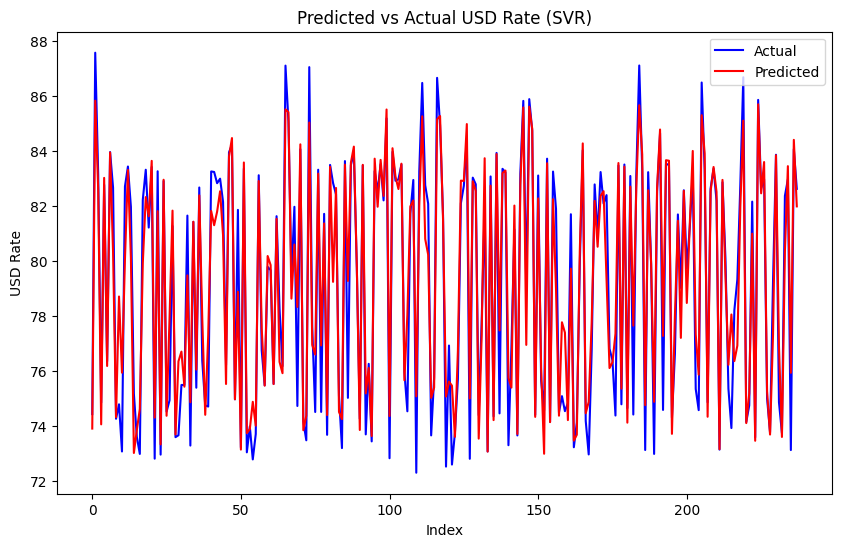

Results for KNN:
Accuracy:  0.9961078410268002
Mean Absolute Error:  0.18467351041866573
Mean Squared Error:  0.07669585479258718
Root Mean Squared Error:  0.27694016464317195
R2 Score:  0.9961078410268002
KNN does not have feature importances.


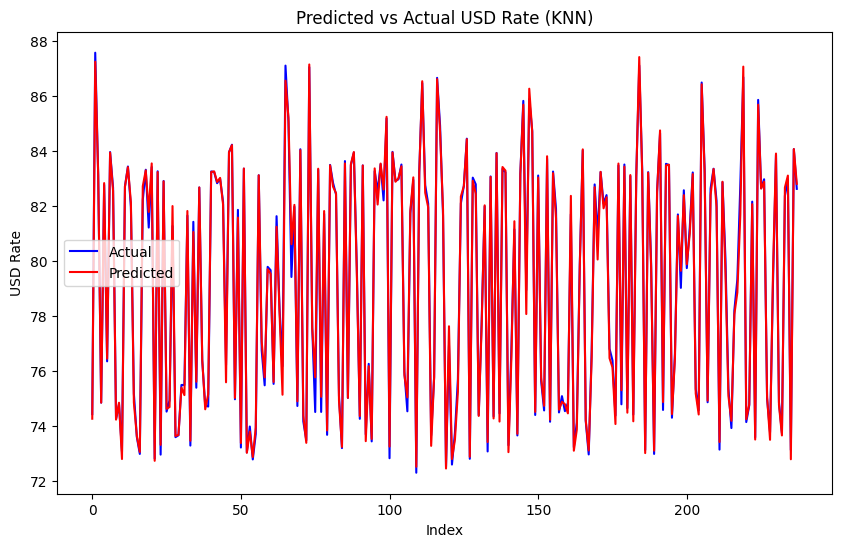

,Model,Accuracy,MAE,MSE,RMSE,R2
0,KNN,0.996108,0.184674,0.076696,0.27694,0.996108
1,XGBoost,0.99076,0.280335,0.182075,0.426702,0.99076
2,CatBoost,0.990412,0.297841,0.188931,0.434662,0.990412
3,LightGBM,0.9886,0.292859,0.224645,0.473968,0.9886
4,Random Forest,0.987862,0.294115,0.23919,0.489071,0.987862
5,SVR,0.906436,0.94124,1.843695,1.357827,0.906436


In [30]:
# Using hyperparameter tuning for each model to improve performance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import math

# Define the parameter grid for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
}
param_grid_catboost = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
}
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly'],
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
param_grid = {
    'Random Forest': param_grid_rf,
    'XGBoost': param_grid_xgb,
    'LightGBM': param_grid_lgbm,
    'CatBoost': param_grid_catboost,
    'SVR': param_grid_svr,
    'KNN': param_grid_knn
}

# Perform hyperparameter tuning for each model
best_models = {}
for model_name, param_grid in param_grid.items():
    if model_name == 'Random Forest':
        model = RandomForestRegressor(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBRegressor(random_state=42)
    elif model_name == 'LightGBM':
        model = LGBMRegressor(random_state=42)
    elif model_name == 'CatBoost':
        model = CatBoostRegressor(random_state=42, verbose=0)
    elif model_name == 'SVR':
        model = SVR()
    elif model_name == 'KNN':
        model = KNeighborsRegressor()
    else:
        continue

    # Use RandomizedSearchCV for faster tuning
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='r2',
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    best_models[model_name] = search.best_estimator_
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best score for {model_name}: {search.best_score_}")

# Evaluate the best models on the test set
best_model_name = []
best_model_accuracy = []
best_model_mae = []
best_model_mse = []
best_model_rmse = []
best_model_r2 = []

for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    best_model_name.append(model_name)
    best_model_r2.append(r2_score(y_test, y_pred))
    best_model_accuracy.append(model.score(X_test, y_test))
    best_model_mae.append(mean_absolute_error(y_test, y_pred))
    best_model_mse.append(mean_squared_error(y_test, y_pred))
    best_model_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))

    print(f"Results for {model_name}:")
    print("Accuracy: ", model.score(X_test, y_test))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred))

    try:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("Feature ranking:")
        for f in range(X_train.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature importances for {model_name}")
        plt.bar(range(X_train.shape[1]), importances[indices], align="center")
        plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.show()
        plt.savefig(f"feature_importances_{model_name}.png")
    except AttributeError:
        print(f"{model_name} does not have feature importances.")
    except Exception as e:
        print(f"Error plotting feature importances for {model_name}: {e}")

    # Plotting the predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red')
    plt.title(f'Predicted vs Actual USD Rate ({model_name})')
    plt.xlabel('Index')
    plt.ylabel('USD Rate')
    plt.legend()
    plt.show()

best_results_df = pd.DataFrame(data=[best_model_name, best_model_accuracy, best_model_mae, best_model_mse, best_model_rmse, best_model_r2]).T
best_results_df.columns = ['Model', 'Accuracy', 'MAE', 'MSE', 'RMSE', 'R2']
best_results_df = best_results_df.sort_values(by='Accuracy', ascending=False)
best_results_df = best_results_df.reset_index(drop=True)
best_results_df


In [31]:
# Save the results to a CSV file
results_df.to_csv('model_results.csv', index=False)
best_results_df.to_csv('best_model_results.csv', index=False)

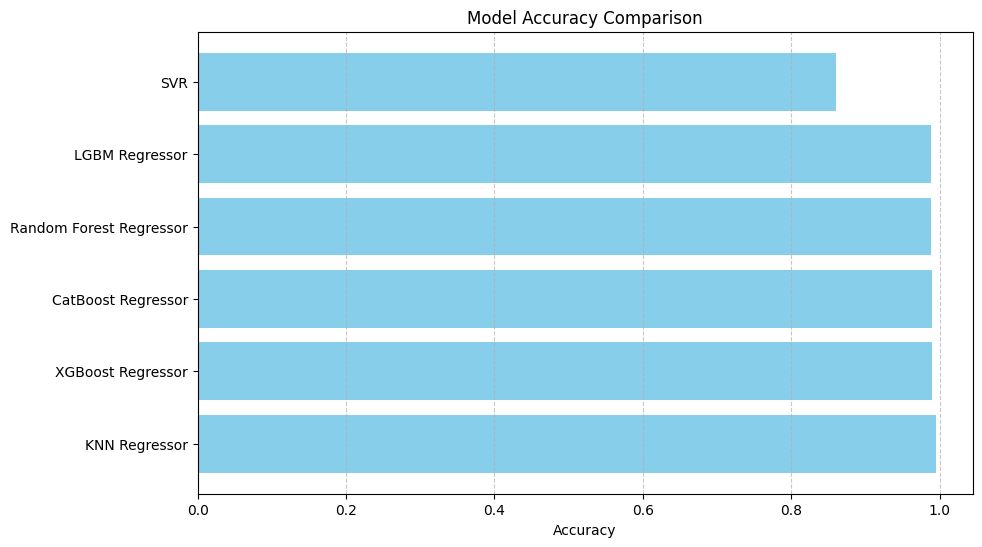

<Figure size 800x700 with 0 Axes>

In [32]:
# Plotting accuracy of all models
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')

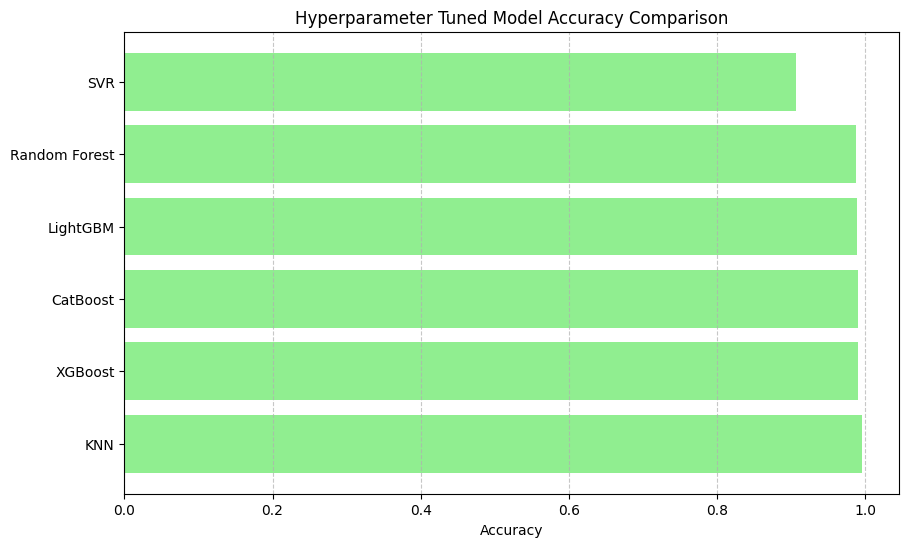

<Figure size 800x700 with 0 Axes>

In [ ]:
# Plotting accuracy of hyperparameter tuned models
plt.figure(figsize=(10, 6))
plt.barh(best_results_df['Model'], best_results_df['Accuracy'], color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Hyperparameter Tuned Model Accuracy Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('hyperparameter_tuned_model_accuracy_comparison.png')